<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

**Nama :** Muhamad Anang Abdullah Faqih

**Kelas :** D4 TI 3D

**NIM :** 2241720070

## Tugas Praktikum

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

def convolution2d(image, kernel, stride, padding):
  padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

  output_height = (padded_image.shape[0] - kernel.shape[0]) // stride + 1
  output_width = (padded_image.shape[1] - kernel.shape[1]) // stride + 1

  output = np.zeros((output_height, output_width))

  for i in range(0, output_height):
    for j in range(0, output_width):
      region = padded_image[i * stride : i * stride + kernel.shape[0], j * stride : j * stride + kernel.shape[1]]
      output[i, j] = np.sum(region * kernel)

  return output.astype(np.float32)/255

# Load Citra
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

**Kernel Sharpen**

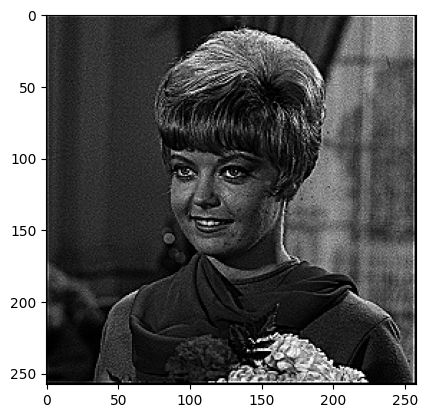

In [10]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

result = convolution2d(img_gray, sharpen, 1, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

**Kernel Emboss**

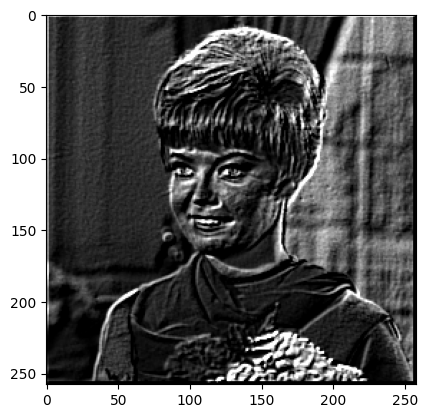

In [12]:
emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

result = convolution2d(img_gray, emboss, 1, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

**Left sobel edge detection**

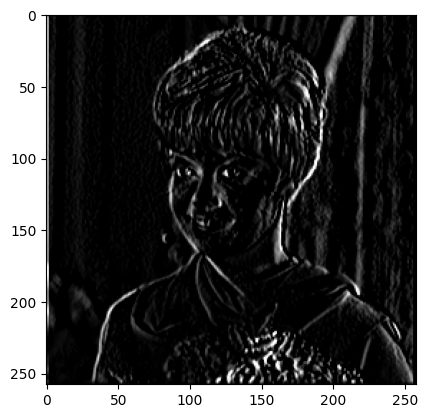

In [13]:
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

result = convolution2d(img_gray, sobel, 1, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

Canny edge detection

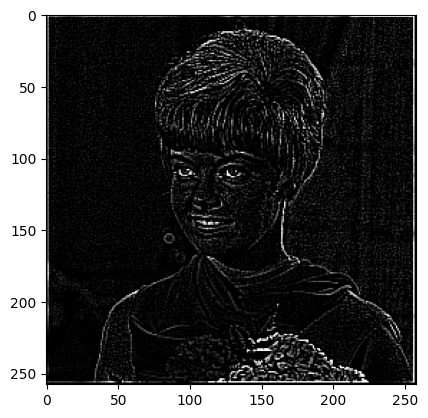

In [5]:
canny = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

result = convolution2d(img_gray, canny, 1, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

**Prewitt edge detection**

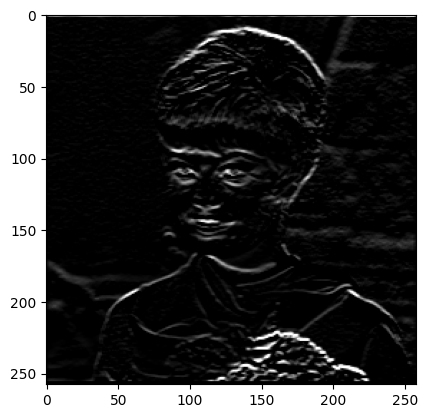

In [7]:
prewitt = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

result = convolution2d(img_gray, prewitt, 1, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

**5*5 Gaussian Blur**

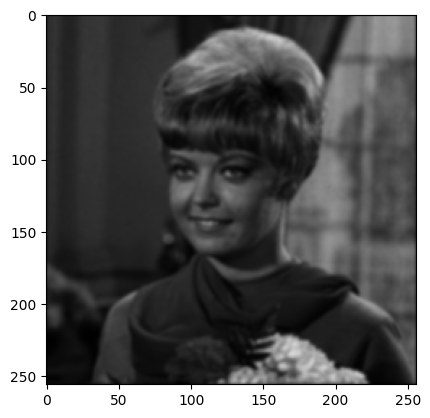

In [8]:
gaussian = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) * (1 / 256)

result = convolution2d(img_gray, gaussian, 1, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

**21 * 21 gaussian blur**

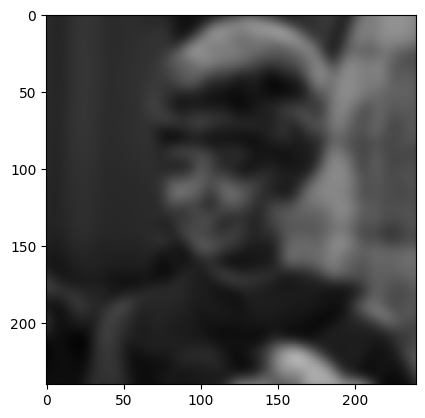

In [9]:
kernel_size = 21

sigma=math.sqrt(kernel_size)
gaussian_kernel =cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

result = convolution2d(img_gray,gauss_kernel,1,2)
plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))